In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths
from collections import defaultdict
from fractions import Fraction
import cmath
import math

In [2]:
# variables
T0 = 2
T1 = 0.25
w0 = 2*math.pi/T0
A = 1/T1
N1 = 10
N2 = 25
w0

3.141592653589793

In [3]:
t_unit = []
iterator = np.arange(0,5,0.05)
for i in iterator:
    if abs(i-T0) < T1/2:
        t_unit.append(i)
t_unit

[1.9000000000000001, 1.9500000000000002, 2.0, 2.0500000000000003, 2.1]

In [4]:
width = t_unit[-1]-t_unit[0]

In [5]:
omega = np.linspace(-5*2*math.pi/width,5*2*math.pi/width, 100)
# omega = np.linspace(-150,150, 300)
omega

array([-157.07963268, -153.90630677, -150.73298085, -147.55965494,
       -144.38632903, -141.21300312, -138.0396772 , -134.86635129,
       -131.69302538, -128.51969947, -125.34637355, -122.17304764,
       -118.99972173, -115.82639581, -112.6530699 , -109.47974399,
       -106.30641808, -103.13309216,  -99.95976625,  -96.78644034,
        -93.61311443,  -90.43978851,  -87.2664626 ,  -84.09313669,
        -80.91981077,  -77.74648486,  -74.57315895,  -71.39983304,
        -68.22650712,  -65.05318121,  -61.8798553 ,  -58.70652939,
        -55.53320347,  -52.35987756,  -49.18655165,  -46.01322573,
        -42.83989982,  -39.66657391,  -36.493248  ,  -33.31992208,
        -30.14659617,  -26.97327026,  -23.79994435,  -20.62661843,
        -17.45329252,  -14.27996661,  -11.10664069,   -7.93331478,
         -4.75998887,   -1.58666296,    1.58666296,    4.75998887,
          7.93331478,   11.10664069,   14.27996661,   17.45329252,
         20.62661843,   23.79994435,   26.97327026,   30.14659

In [6]:
# find period of sequantial signals
times = defaultdict(list)
for n in range(1,3):
    for t in iterator:
        if abs(t-n*T0) < T1/2:
            times[n].append(t)
# times = np.array(times.values()).mean()
np.mean(np.asarray(list(times.values())), axis=0)

array([2.9 , 2.95, 3.  , 3.05, 3.1 ])

In [7]:
t2 = t_unit[-1]

In [49]:
def unit_func(w):
    return A*width*cmath.exp(-1j*w*T0)*np.sinc(w*width/(2*math.pi))
#     return A*width*np.sinc(w*width/(2*math.pi))
def unit_func_phase(w):
    return cmath.exp(-1j*w*T0)

In [50]:
# using abs() refer my plot to amplitude representaion
shifted_pulse = []
shifted_pulse_phase = []
shifted_pulse_sum = []
for w in omega:
    shifted_pulse.append(unit_func(w).real)
    shifted_pulse_phase.append(unit_func_phase(w).imag)
    shifted_pulse_sum.append(abs(unit_func(w)))
    

Text(0, 0.5, 'f($\\omega$)')

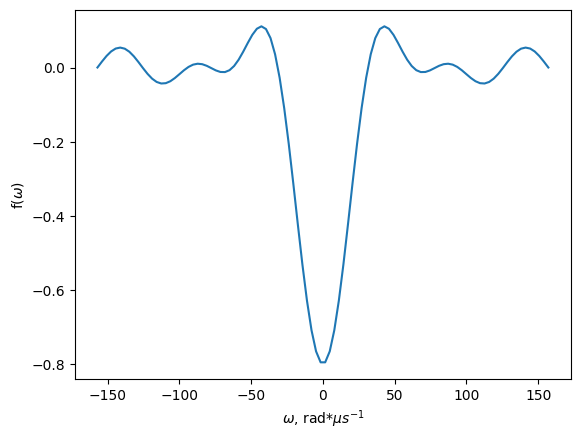

In [51]:
plt.plot(omega, shifted_pulse)
plt.xlabel("$\omega$, rad*$\mu$$s^{-1}$")
plt.ylabel("f($\omega$)")

Text(0, 0.5, '$\\phi$($\\omega$)')

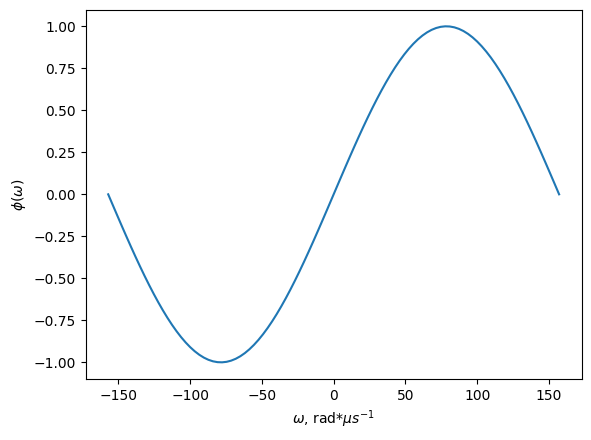

In [52]:
plt.plot(omega, shifted_pulse_phase)
plt.xlabel("$\omega$, rad*$\mu$$s^{-1}$")
plt.ylabel("$\phi$($\omega$)")

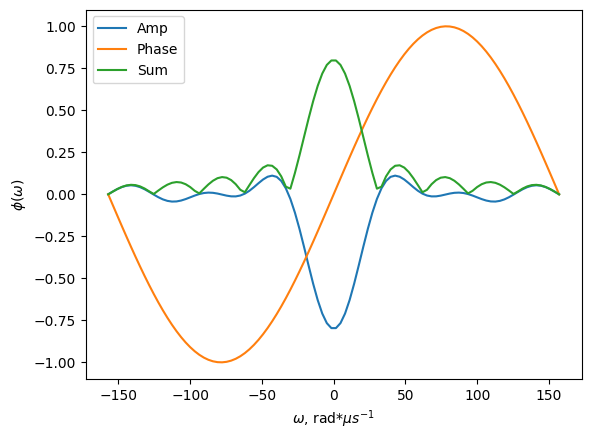

In [53]:
plt.plot(omega, shifted_pulse, label="Amp")
plt.plot(omega, shifted_pulse_phase, label="Phase")
plt.plot(omega, shifted_pulse_sum, label="Sum")
plt.xlabel("$\omega$, rad*$\mu$$s^{-1}$")
plt.ylabel("$\phi$($\omega$)")
plt.legend()

In [12]:
# using abs() refer my plot to amplitude representaion
shifted_pulse_amp = []
for w in omega:
    shifted_pulse_amp.append(abs(unit_func(w)))

Text(0, 0.5, '|f($\\omega$)|')

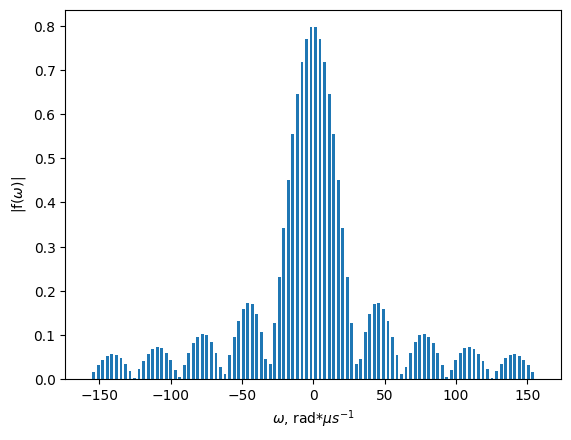

In [62]:
# plt.plot(omega, shifted_pulse_amp)
plt.bar(omega, shifted_pulse_amp, width = 2)
plt.xlabel("$\omega$, rad*$\mu$$s^{-1}$")
plt.ylabel("|f($\omega$)|")

In [14]:
def cn_coef(N):
    return A*width/T0*cmath.exp(-1j*2*math.pi*N)*np.sinc(N*width/T0)

In [30]:
# N1 = 10
pereodic_cn_coef_1 = []
cn_x_1 = np.arange(-w0*N1,w0*N1,1)
for n in cn_x_1:
    pereodic_cn_coef_1.append(abs(cn_coef(n)))

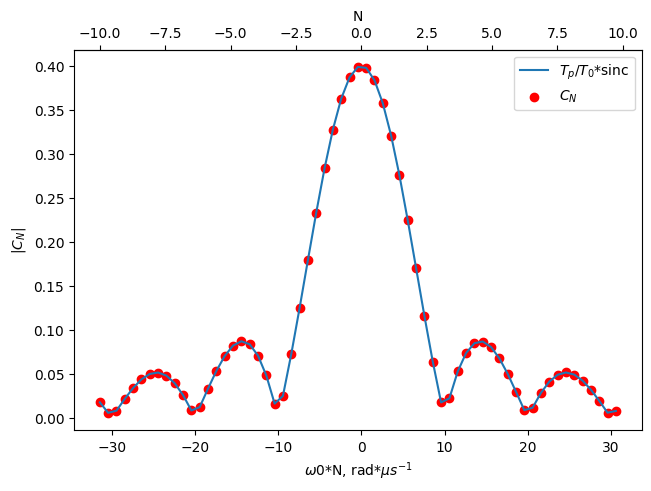

In [31]:
fig, ax = plt.subplots(constrained_layout=True)
plt.plot(cn_x_1, pereodic_cn_coef_1, label="$T_p$/$T_0$*sinc")
plt.scatter(cn_x_1, pereodic_cn_coef_1, color="red", label="$C_N$")
plt.xlabel("$\omega$0*N, rad*$\mu$$s^{-1}$")
plt.ylabel("|$С_N$|")
secax = ax.secondary_xaxis('top', functions=(lambda x: x/w0, lambda x: x*w0))
secax.set_xlabel('N')

plt.legend()


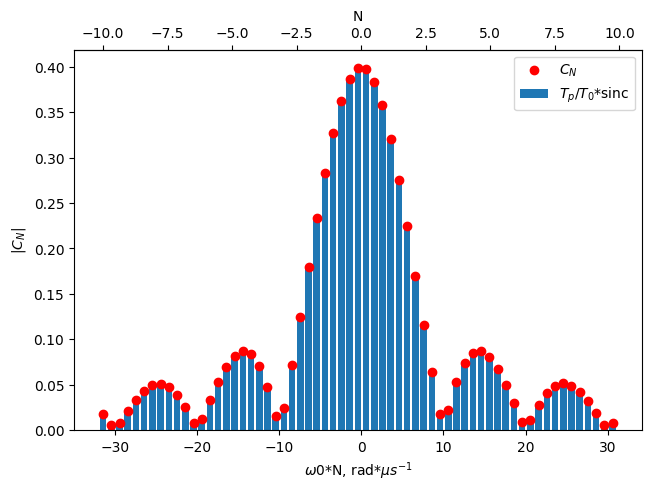

In [57]:
fig, ax = plt.subplots(constrained_layout=True)
plt.bar(cn_x_1, pereodic_cn_coef_1, label="$T_p$/$T_0$*sinc")
plt.scatter(cn_x_1, pereodic_cn_coef_1, color="red", label="$C_N$")
plt.xlabel("$\omega$0*N, rad*$\mu$$s^{-1}$")
plt.ylabel("|$С_N$|")
secax = ax.secondary_xaxis('top', functions=(lambda x: x/w0, lambda x: x*w0))
secax.set_xlabel('N')
plt.legend()

In [32]:
# N1 = 25
pereodic_cn_coef_2 = []
cn_x_2 = np.arange(-w0*N2,w0*N2,1)
for n in cn_x_2:
    pereodic_cn_coef_2.append(abs(cn_coef(n)))

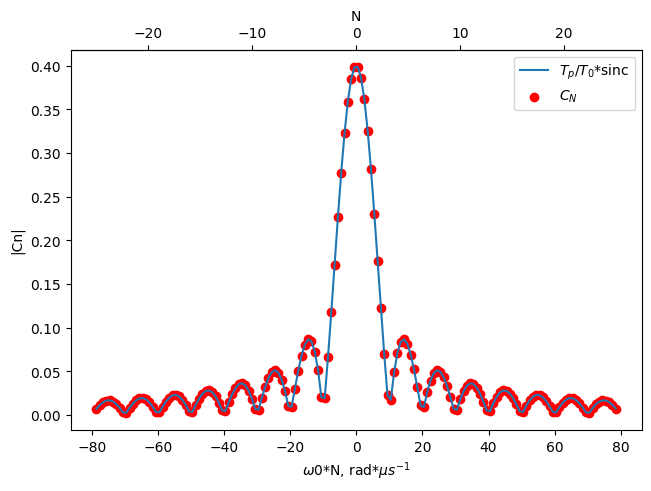

In [33]:
fig, ax = plt.subplots(constrained_layout=True)
plt.plot(cn_x_2, pereodic_cn_coef_2, label="$T_p$/$T_0$*sinc")
plt.scatter(cn_x_2, pereodic_cn_coef_2, color="red", label="$C_N$")
plt.xlabel("$\omega$0*N, rad*$\mu$$s^{-1}$")
plt.ylabel("|Сn|")

secax = ax.secondary_xaxis('top', functions=(lambda x: x/w0, lambda x: x*w0))
secax.set_xlabel('N')

plt.legend()

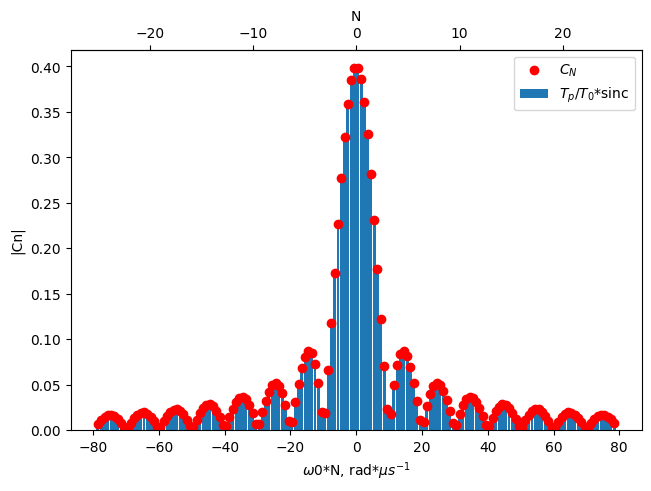

In [67]:
fig, ax = plt.subplots(constrained_layout=True)
plt.bar(cn_x_2, pereodic_cn_coef_2, label="$T_p$/$T_0$*sinc", width=0.9)
plt.scatter(cn_x_2, pereodic_cn_coef_2, color="red", label="$C_N$")
plt.xlabel("$\omega$0*N, rad*$\mu$$s^{-1}$")
plt.ylabel("|Сn|")

secax = ax.secondary_xaxis('top', functions=(lambda x: x/w0, lambda x: x*w0))
secax.set_xlabel('N')

plt.legend()

In [34]:
# 1st and 2nd spectra
pereodic_cn_coef_sp_1 = np.asarray(pereodic_cn_coef_1)**2
pereodic_cn_coef_sp_2 = np.asarray(pereodic_cn_coef_2)**2

In [35]:
# find peaks and width for 1st and 2nd spectra
peaks_1, _ = find_peaks(pereodic_cn_coef_sp_1)
peaks_2, _ = find_peaks(pereodic_cn_coef_sp_2)
widths_1 = peak_widths(pereodic_cn_coef_sp_1, peaks_1)
widths_2 = peak_widths(pereodic_cn_coef_sp_2, peaks_2)
wd_1 = widths_1[2:] - abs(cn_x_1.min())
wd_2 = widths_2[2:] - abs(cn_x_2.min())
FWHM_1, FWHM_2 = np.absolute(wd_1[:, 2]).sum(), np.absolute(wd_2[:,7]).sum()

In [36]:
FWHM_1, FWHM_2

(8.892937193414966, 8.899952675869471)

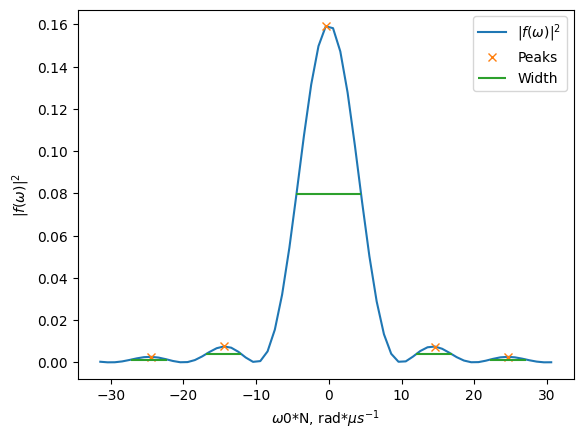

In [37]:
# plot peaks and widths for 1st spectrum
plt.plot(cn_x_1, pereodic_cn_coef_sp_1, label="$|f(\omega)|^2$")
plt.plot(cn_x_1[peaks_1], pereodic_cn_coef_sp_1[peaks_1], "x", label="Peaks")
plt.hlines(widths_1[1], *wd_1, color="C2", label="Width")
plt.xlabel("$\omega$0*N, rad*$\mu$$s^{-1}$")
plt.ylabel("$|f(\omega)|^2$")
plt.legend()

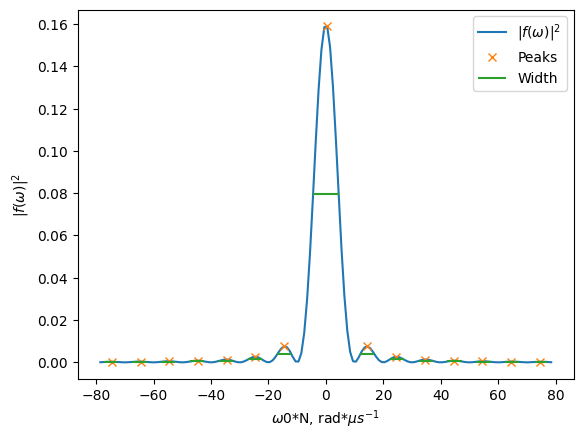

In [38]:
# plot peaks and widths for 1st spectrum
plt.plot(cn_x_2, pereodic_cn_coef_sp_2, label="$|f(\omega)|^2$")
plt.plot(cn_x_2[peaks_2], pereodic_cn_coef_sp_2[peaks_2], "x", label="Peaks")
plt.hlines(widths_2[1], *wd_2, color="C2", label="Width")
plt.xlabel("$\omega$0*N, rad*$\mu$$s^{-1}$")
plt.ylabel("$|f(\omega)|^2$")
plt.legend()

In [39]:
# find peaks for 2nd spectrum